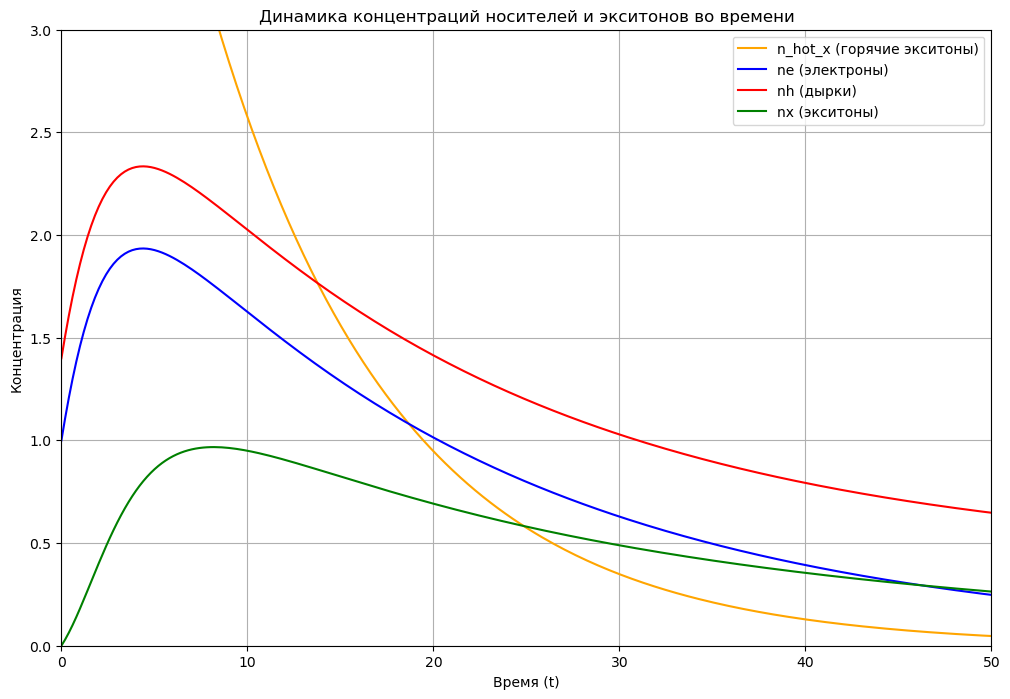

In [4]:
#Через odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint #solve_ivp

# Параметры задачи
gamma_d = 0.1      # скорость релаксации "горячих" экситонов
kappa_c = 0.1     # коэффициент взаимодействия
kappa_ex = 0.1    # коэффициент экситонного затухания
N0 = 7          # начальная концентрация горячих экситонов
ne_0 = 1.0        # начальная концентрация электронов
nh_0 = 1.4        # начальная концентрация дырок

# Функция для расчета производных
def model(y, t, N0, gamma_d, kappa_c, kappa_ex):
    ne, nh, nx = y
    n_hot_x = N0*np.exp(-gamma_d * t)  # Уравнение (10)
    dne_dt = gamma_d * n_hot_x - kappa_ex * ne * nh  # Уравнение (11)
    dnh_dt = dne_dt
    dnx_dt = kappa_ex * ne * nh - kappa_c * nx * (ne + nh)  # Уравнение (12)
    
    return [dne_dt, dnh_dt, dnx_dt]

# Временной массив
t = np.linspace(0, 100, 500)  # от 0 до 50 с

# Начальные условия
y0 = [ne_0, nh_0, 0]  #  ne(концентрация е), nh(концентрация дырок), nx(концентрация экситонов)

# Интеграция уравнений
result = odeint(model, y0, t, args=(N0, gamma_d, kappa_c, kappa_ex))


# Извлечение результатов
ne, nh, nx = result.T
n_hot_x = N0*np.exp(-gamma_d * t)

# Построение графиков
plt.figure(figsize=(12, 8))
plt.plot(t, n_hot_x, label='n_hot_x (горячие экситоны)', color='orange')
plt.plot(t, ne, label='ne (электроны)', color='blue')
plt.plot(t, nh, label='nh (дырки)', color='red')
plt.plot(t, nx, label='nx (экситоны)', color='green')
plt.title('Динамика концентраций носителей и экситонов во времени')
plt.xlabel('Время (t)')
plt.ylabel('Концентрация')
plt.legend()
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 3)
plt.show()

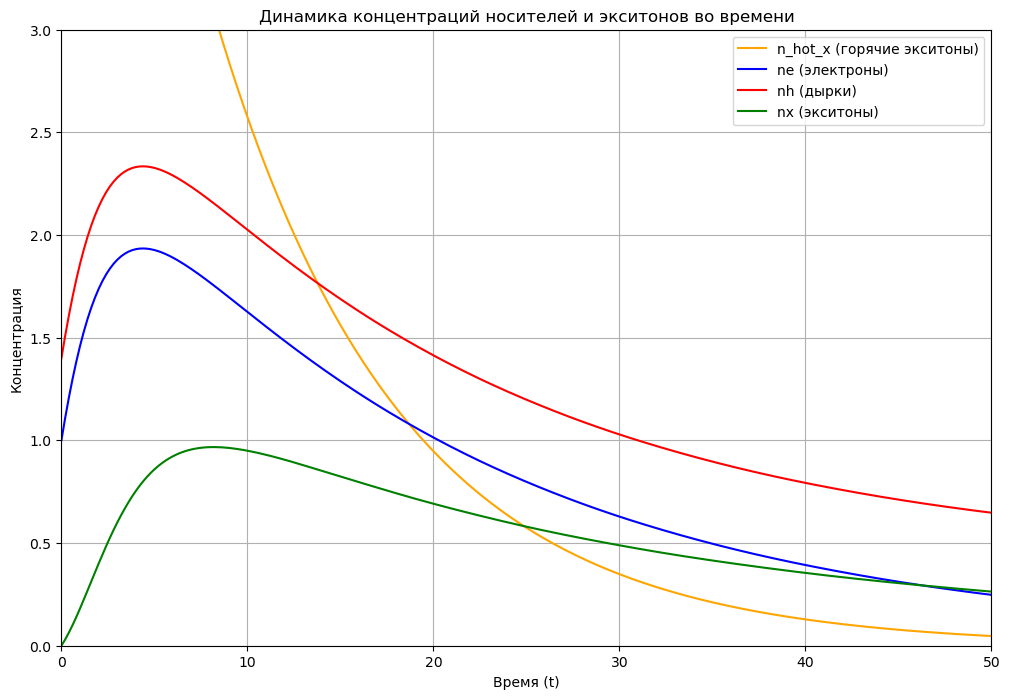

In [5]:
#Через solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметры задачи
gamma_d = 0.1      # скорость релаксации "горячих" экситонов
kappa_c = 0.1      # коэффициент взаимодействия
kappa_ex = 0.1     # коэффициент экситонного затухания
N0 = 7             # начальная концентрация горячих экситонов
ne_0 = 1.0         # начальная концентрация электронов
nh_0 = 1.4         # начальная концентрация дырок

# Функция для расчета производных
def model(t, y, N0, gamma_d, kappa_c, kappa_ex):
    ne, nh, nx = y
    n_hot_x = N0 * np.exp(-gamma_d * t)  # Уравнение (10)
    dne_dt = gamma_d * n_hot_x - kappa_ex * ne * nh  # Уравнение (11)
    dnh_dt = dne_dt
    dnx_dt = kappa_ex * ne * nh - kappa_c * nx * (ne + nh)  # Уравнение (12)
    
    return [dne_dt, dnh_dt, dnx_dt]

# Временной массив
t_span = (0, 100)  # от 0 до 100 с
t_eval = np.linspace(0, 100, 500)  # временные точки для оценки

# Начальные условия
y0 = [ne_0, nh_0, 0]  # ne(концентрация е), nh(концентрация дырок), nx(концентрация экситонов)

# Интеграция уравнений
result = solve_ivp(model, t_span, y0, args=(N0, gamma_d, kappa_c, kappa_ex), t_eval=t_eval)

# Извлечение результатов
ne, nh, nx = result.y
n_hot_x = N0 * np.exp(-gamma_d * result.t)

# Построение графиков
plt.figure(figsize=(12, 8))
plt.plot(result.t, n_hot_x, label='n_hot_x (горячие экситоны)', color='orange')
plt.plot(result.t, ne, label='ne (электроны)', color='blue')
plt.plot(result.t, nh, label='nh (дырки)', color='red')
plt.plot(result.t, nx, label='nx (экситоны)', color='green')
plt.title('Динамика концентраций носителей и экситонов во времени')
plt.xlabel('Время (t)')
plt.ylabel('Концентрация')
plt.legend()
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 3)
plt.show()